In [ ]:
import numpy as np
import pandas as pd  # для работы с таблицами
from scipy import stats # При работе со статистикой
import matplotlib.pyplot as plt  # Библиотека для визуализации результатов

import seaborn as sns # Более продвинутая библиотека для визуализации

# Задания для самостоятельного решения


<div class="alert alert-info">
<b>Задание № 0</b>

### Найдите минимально необходимый объем выборки для построения интервальной оценки среднего.

- желаемая точность $\Delta$ = 3;
- дисперсия $\sigma^2$  = 225;
- уровень доверия $\beta$ = 0.95.
    
Ответ округлите до целого
</div>

In [ ]:
sigma = int(225**0.5)  # Стандартное отклонение
Z = 1.96  # Квантиль нормального распределения (при уровне доверия 95%)
Delta = 3 # Погрешность

In [ ]:
n = int(((sigma*Z)/Delta)**2)
n

96

<div class="alert alert-info">
<b>Задание № 1</b>

### Постройте `98% доверительный интервал` для среднего значения, если известно, что

- объем выборки n = 25;
- среднее значение по выборке $\overline x$ = 130;
- Из достоверных источников известно стандартное отклонение $\sigma = 15$.
    
В ответ укажите длину полученного доверительного интервала (разницу между правым и левым концом), окруленную до целого
</div>

In [ ]:
data = range(1,26)

dov_int=stats.t.interval(alpha=0.98, df=len(data)-1, loc=130, scale=15) # доверительный интервал для небольшой выборки
L=np.round(np.diff(dov_int),0) # длина доверительного интервала
dov_int, L


((92.61760790263637, 167.38239209736363), array([75.]))

<div class="alert alert-info">
<b>Задание № 2</b>

### Даны две выборки роста мужчин и женщин.
- Докажите, используя `t-Тест Стьюдента`, что различие между выборками незначительно, если уровень значимости равен $\alpha$ `= 0.001`.
- Покажите различия визуально
</div>

In [ ]:
np.random.seed(42) #фиксация случайности

mens  = stats.norm.rvs(loc=171, scale=100, size=150000)  # Выборка мужчин со средним ростом 171
womens = stats.norm.rvs(loc=170, scale=100, size=150000)  # Выборка женщин со средним ростом 170
#В двух строчках выше генерируется две выбороки, где loc это среднее значение, а scale это дисперсия

### Ваш код...
mens, womens

(array([220.6714153 , 157.17356988, 235.76885381, ..., 153.17637284,
        186.15878424, 247.78600344]),
 array([306.98779809, 159.17348874,  61.69130837, ..., 102.03618712,
         62.7908246 , 134.21538259]))

In [ ]:
# Принимаем нулевую гипотезу, что различие между группами незначительное

In [ ]:
t, p_value = stats.ttest_ind(mens, womens) #Критерий Стьюдента (t-test)
t, p_value

(3.6635841716708892, 0.00024875321033580573)

In [ ]:
stats.ttest_ind(mens, womens, equal_var = True) # если True, выполните стандартный независимый t-критерий с двумя выборками, который предполагает равные дисперсии генеральной совокупности.

Ttest_indResult(statistic=3.6635841716708892, pvalue=0.00024875321033580573)

In [ ]:
# Из значения p_value при заданном уровне значимости (0,02%<0,1%) следует, что мы отвергаем нулевую гипотезу.

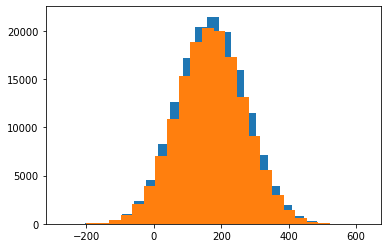

In [ ]:
plt.hist(mens, bins=25);
plt.hist(womens, bins=25);

In [ ]:
# При визуализации видно, что отличия есть. При заданном уровне значимости делаем вывод что отличия нельзя назвать незначительными.

<div class="alert alert-info">
<b>Задание № 3</b>

### Определите объем необходимой выборки для исследования среднего чека за кофе в случайном городе если известно, что в этом городе:

- стандартное отклонение $\sigma = 150$;
- уровень доверия $\beta$  = 95%;
- Погрешность $\Delta = 50$ рублей.
</div>

In [ ]:
sigma = 150  # Стандартное отклонение
Z = 1.96  # Квантиль нормального распределения (при уровне доверия 95%)
Delta = 50 # Погрешность

In [ ]:
N = int(((sigma*Z)/Delta)**2)
N

34

<div class="alert alert-info">
<b>Задание № 4</b>

### Представьте, что вы хотите разоблачить "волшебника" который считает, что умеет предсказывать погоду на завтра, отвечая просто: дождь или солнце. Вы пронаблюдали за ответами "волшебника" в течении какого-то периода времени и получили некие результаты (см.ниже).

Можно ли сказать, что маг действительно умеет предсказывать погоду? Уровень значимости принять за `0.05` ($\alpha=0.05$).
</div>

In [ ]:
observations = pd.DataFrame([[10, 15],[39, 34]],
                            index=['Дождь','Солнце'],
                            columns=['Верные ответы волшебника','Неверные ответы'])
observations

,Верные ответы волшебника,Неверные ответы
Дождь,10,15
Солнце,39,34


In [ ]:
# Учтите, что у стат. тестов, в том числе и точного теста Фишера под нулевой гипотезой подразумевается случайность/отсутсвие эффекта
# За нулевую гипотезу принимаем случайность, то есть маг не умеет предсказывать погоду
oddsratio, pvalue = stats.fisher_exact(observations) # Точный тест Фишера

oddsratio, pvalue

(0.5811965811965812, 0.35417955365927367)

In [ ]:
# Получилось р=35% > a=5% , нельзя отвергать нулевую гипотезу. Вывод: маг не умеет предсказывать погоду

<div class="alert alert-info">
<b>Задание № 5</b>

### Используя функцию mean_confidence_interval(data, confidence), постройте доверительный интервал с уровнем доверия $\beta = 90\%$ для выборки:

</div>

In [ ]:
data = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,
        7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]
def mean_confidence_interval(data, confidence=0.9):
    n = len(data)
    m, se = np.mean(data), stats.sem(data)
    h = se * stats.t.ppf((1 + confidence)/2, n)  #  функция ppf из scipy возвращает нам перцентиль
    return m-h, m, m+h
print(mean_confidence_interval(data, 0.90))

(6.074074746111319, 6.628571428571429, 7.183068111031539)


<div class="alert alert-info">
<b>Задание № 6</b>

### Принадлежат ли выборки `A` и `B` одному множеству?
    
- Оцените это с помощью известных вам тестов для проверок статистических гипотез;
- Покажите различия визуально.
</div>

In [ ]:
A = [4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4,
    6,7,9,8,6,5,7,8,6,7,5,6,8,6,7,5,
    4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4,
    6,7,9,8,6,5,7,8,6,7,5,6,8,6,7,5,
    4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4,
    6,7,9,8,6,5,7,8,6,7,5,6,8,6,7,5,
    4,5,8,9,6,7,5,6,7,6,8,5,6,7,8,4]

B = [5,6,7,8,4,6,7,2,6,5,7,5,3,5,3,
    5,3,5,5,8,7,6,4,5,3,5,4,6,4,5,3,
    2,6,4,3,5,4,3,4,5,4,3,4,5,4,3,4,
    2,6,4,3,5,4,3,4,5,4,3,4,5,4,3,4,
    3,4,4,1,2,4,3,2,4,3,2,1,5,3,4,6,
    3,2,4,5,6,4,3,3,5,3,4,4,4,2,5,3]


# проверяем с помощью t-Тест Стьюдента
# нулевая гипотеза - выборки принадлежат одному множеству

t_value: 11.865233896372924 _pvalue:  4.623319592204015e-25


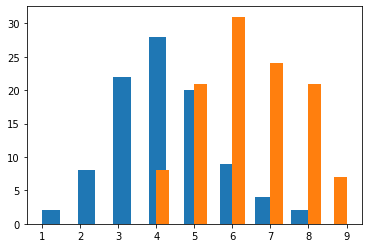

In [ ]:
tvalue, pvalue = stats.ttest_ind(A, B)
print('t_value:',tvalue, '_pvalue: ',pvalue)

plt.hist(B, bins=15);
plt.hist(A, bins=15);

In [ ]:
# Визуально можно определить, что выборки принадлет разным множествам
# P-уровень значимости стремится к 0; уровень значимости не был задан, поэтому принимаем самую распространённую оценку 0,05
# P-значение < 0,05, отвергаем нулевую гипотезу. Вывод: выборки не принадлежат одному множеству

<div class="alert alert-info">
<b>Задание № 7 (задание без подвоха)</b>

### На примере датасета про жилье в New York City, мы сталкивались с примером, когда переменная имеет не совсем нормальное распределение.

- Предположим, Вы сформировали две гипотезы:
    - нулевая гипотеза - распределение нормальное;
    - альтернативная гипотеза - распределение ненормальное.
- допустим, вы применили какой-то тест (сейчас неважно какой), который показал уровень значимости  `p-value = 0.03`. Каковы будут ваши выводы? Будем считать что у нас нормальное распределение или все-таки нет?)
    
</div>

In [ ]:
### Ваши выводы: если оценку принимаем 0,05, тогда отвергаем нулевую гипотезу (0,05 > 0,03). Будем считать, то у нас распределение ненормальное.

<div class="alert alert-info">
<b>Задание № 8</b>
    
### Первая выборка — это пациенты, которых лечили препаратом `А`.  Вторая выборка — пациенты, которых лечили препаратом `B`.

Значения в выборках — это некоторая характеристика эффективности лечения (уровень метаболита в крови, температура через три дня после начала лечения, срок выздоровления, число койко-дней, и т.д.)

- Требуется выяснить, имеется ли значимое различие эффективности препаратов `А` и `B`, или различия являются чисто случайными и объясняются «естественной» дисперсией выбранной характеристики?  (`уровень значимости принять за 0.05 (5%)`)

- При каком минимальном p-value различия были бы уже значимы?
    
- Если выборки незначительно отличаются, то продемонстрируйте это визуально
</div>

In [ ]:
np.random.seed(11)
A = stats.norm.rvs(scale=15, loc=169, size=300)
B = stats.norm.rvs(scale=14, loc=171.4, size=300)

### Ваш код:
# Подсказка, обратите внимание на Two-sample T-test

In [ ]:
stats.ttest_ind(A, B, equal_var = False)

Ttest_indResult(statistic=-1.95300880485141, pvalue=0.051284961272800134)

In [ ]:
# Значение p-теста оказывается равным 0,0513, что больше, чем уровень значимости альфа (то есть 0,05).
# Это означает, что нет значимого различия эффективности препаратов А и В (не можем отвергнуть нулевую гипотезу).

In [ ]:
# При каком минимальном p-value различия были бы уже значимы? При любом p-value<0.05

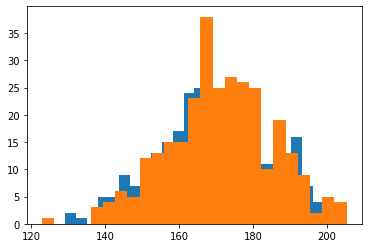

In [ ]:
plt.hist(A, bins=25); #Выборка A
plt.hist(B, bins=25);  #Выборка B

In [ ]:
# Из визуализации видно, что выборки отличаются и гораздо значительнее, чем выборки из задания 2. Но при заданной альфе мы считаем различия незначительными